In [35]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt

In [45]:
(x_train,y_train),(x_test,y_test)=keras.datasets.cifar10.load_data()

#now lets normalize the images
x_train=x_train.astype("float32")/255
x_test=x_test.astype("float32")/255

In [47]:
#As next step we are one -hot encoding the labels
num_classes=10

y_train = y_train.flatten()
y_test = y_test.flatten()

y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

In [51]:

print("Training data shape :",x_train.shape,y_train.shape)
print("Testing data shape :", x_test.shape,y_test.shape)

Training data shape : (50000, 32, 32, 3) (50000, 10)
Testing data shape : (10000, 32, 32, 3) (10000, 10)


In [67]:
#lets create a CNN model
from tensorflow.keras import layers,models
model=models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128,(3,3),activation='relu'),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')

])

model.summary()

C:\Users\prana\anaconda3\envs\fresh_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [69]:
#new we can compile the model

model.compile(optimizer='adam',loss='categorical_crossentropy',
              metrics=['accuracy'])


In [74]:
#Trainign the model.
history=model.fit(x_train,y_train,validation_split=0.2,epochs=10,batch_size=64,verbose=1)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.3372 - loss: 1.7811 - val_accuracy: 0.5367 - val_loss: 1.3009
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - accuracy: 0.5734 - loss: 1.2069 - val_accuracy: 0.5856 - val_loss: 1.1977
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - accuracy: 0.6418 - loss: 1.0248 - val_accuracy: 0.6555 - val_loss: 0.9768
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - accuracy: 0.6838 - loss: 0.9009 - val_accuracy: 0.6718 - val_loss: 0.9405
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.7142 - loss: 0.8160 - val_accuracy: 0.6934 - val_loss: 0.8811
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - accuracy: 0.7459 - loss: 0.7216 - val_accuracy: 0.6977 - val_loss: 0.8646
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.7688 - loss: 0.6568 - val_accuracy: 0.7120 - val_loss: 0.8456
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.7985 - loss: 0.5757 - 

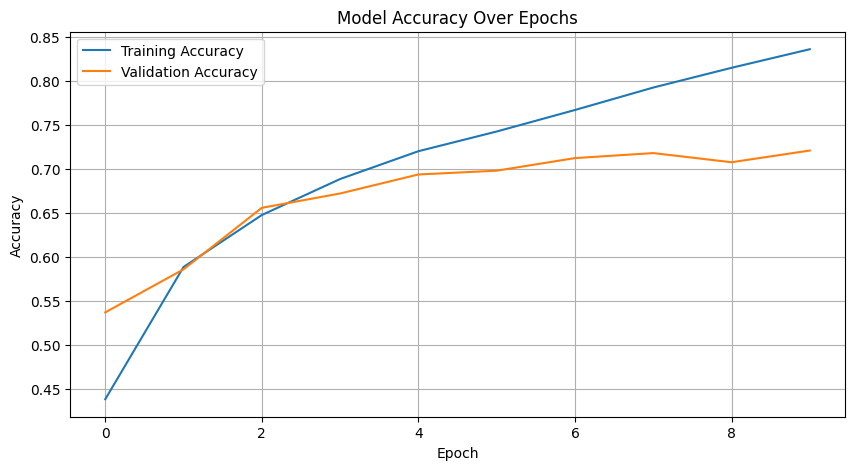

In [76]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()